# Wind Speed Prediction

## Imports

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import shap

## Dataset

In [16]:
df = pd.read_csv('wind_dataset.csv', parse_dates=True, index_col=0)
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
DATE,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [17]:
df.shape

(6574, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6513 non-null   float64
 4   T.MAX    5953 non-null   float64
 5   IND.2    6513 non-null   float64
 6   T.MIN    5900 non-null   float64
 7   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 462.2 KB


In [19]:
df.isnull().sum()

WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [20]:
df = df.dropna()
summary = df.describe().transpose().round(2)
summary

,count,mean,std,min,25%,50%,75%,max
WIND,5638.0,9.68,4.94,0.0,5.91,9.08,12.83,30.37
IND,5638.0,0.40,1.19,0.0,0.00,0.00,0.00,4.00
RAIN,5638.0,1.88,3.97,0.0,0.00,0.20,2.00,67.00
IND.1,5638.0,0.01,0.16,0.0,0.00,0.00,0.00,2.00
T.MAX,5638.0,13.29,4.89,-0.1,9.60,13.10,17.20,26.80
IND.2,5638.0,0.09,0.30,0.0,0.00,0.00,0.00,3.00
T.MIN,5638.0,6.45,4.63,-11.5,3.10,6.50,10.00,18.00
T.MIN.G,5638.0,2.76,5.58,-13.5,-1.00,3.00,7.00,15.80


## Linear Regression Model

In [21]:
X = df.drop('WIND', axis=1)
y = df['WIND']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((4510, 7), (1128, 7))

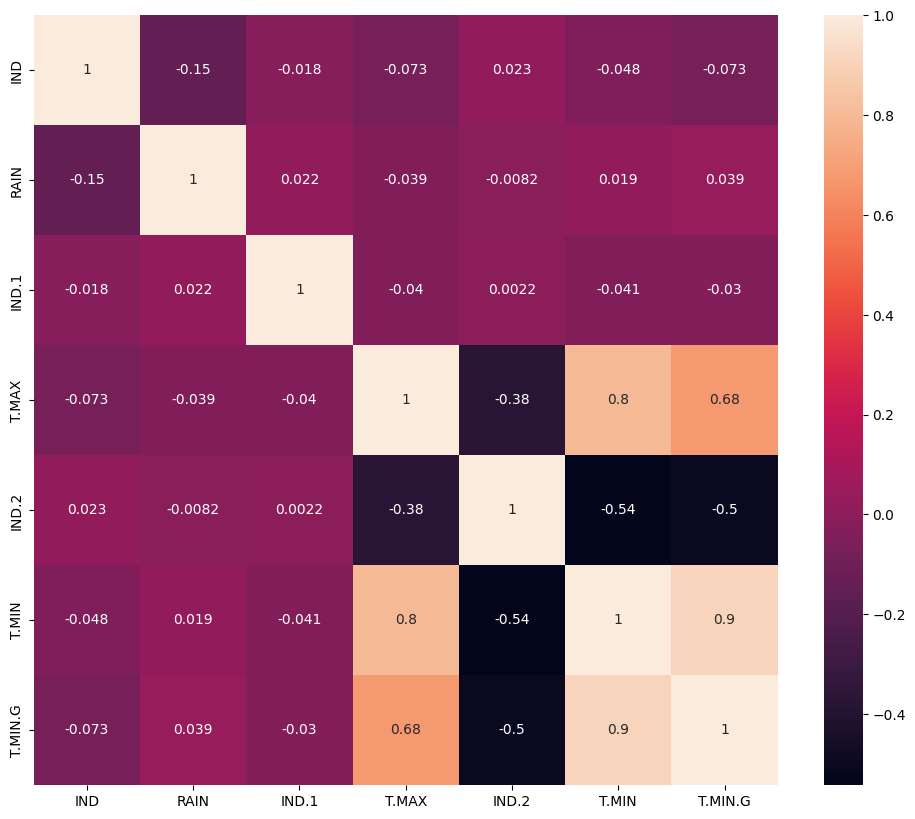

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# TODO: Multikolinearität, Feature Scaling

In [23]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
train_score = linreg.score(X_train, y_train)
test_score = r2_score(y_test, y_pred)

print("Mean absolute error: ", mae)
print("Mean squared error:  ", mse)
print("Train R2 score:      ", train_score)
print("Test R2 Score:       ", test_score)


Mean absolute error:  3.8036656329154677
Mean squared error:   22.127581507032207
Train R2 score:       0.13378355229391492
Test R2 Score:        0.1307709314062695


In [24]:
cdf = pd.DataFrame(linreg.coef_.round(5), X_train.columns, columns=['Coefficients'])
cdf.loc['Intercept'] = linreg.intercept_.round(5)
cdf

,Coefficients
IND,-0.16477
RAIN,0.10285
IND.1,0.09920
T.MAX,-0.42689
IND.2,-1.81849
T.MIN,-0.12598
T.MIN.G,0.28709
Intercept,15.46237


## Shapley Charts

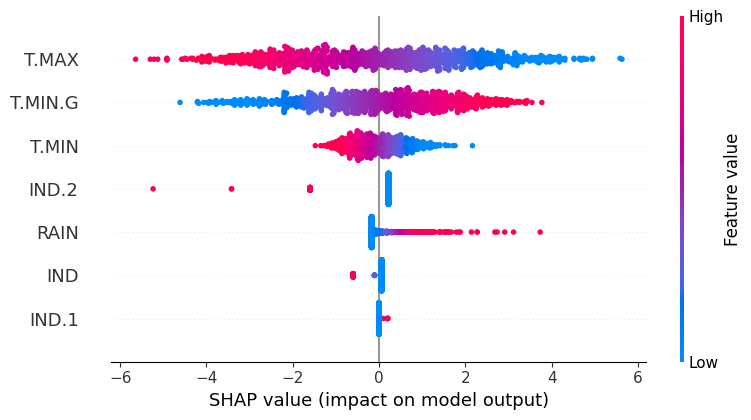

In [25]:
explainer = shap.Explainer(linreg, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

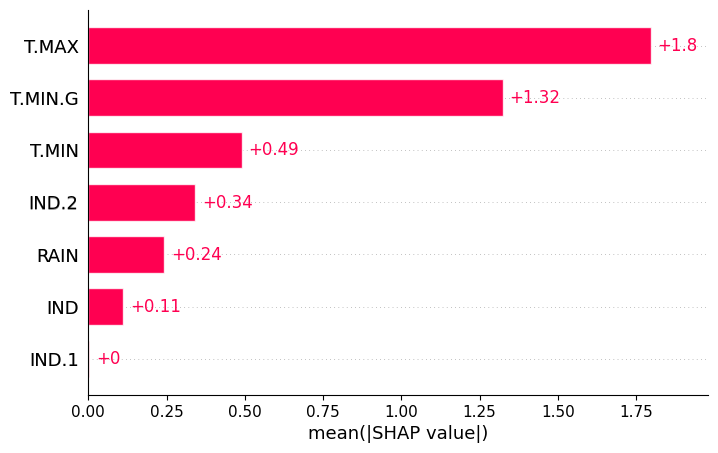

In [26]:
shap.plots.bar(shap_values)

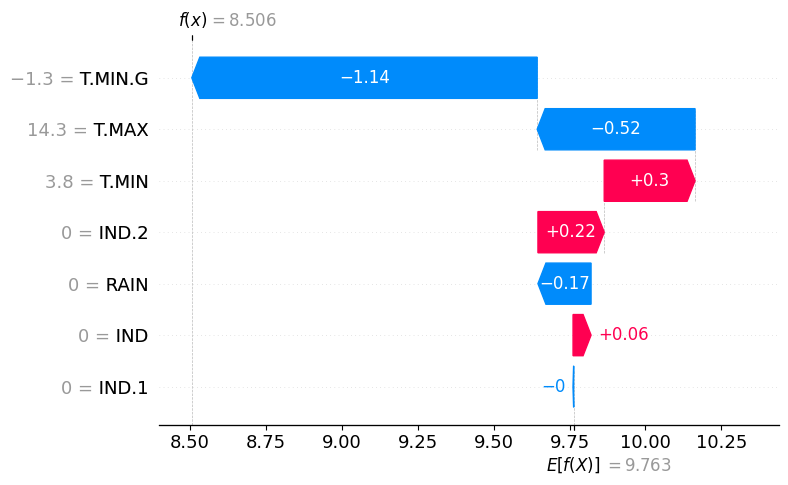

In [27]:
sample_ind = 12
shap.plots.waterfall(shap_values[sample_ind])

In [28]:
shap.plots.force(shap_values[sample_ind])

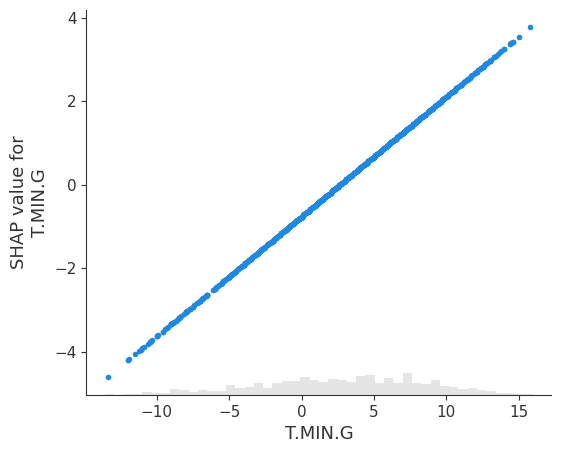

In [29]:
shap.plots.scatter(shap_values[:, "T.MIN.G"])

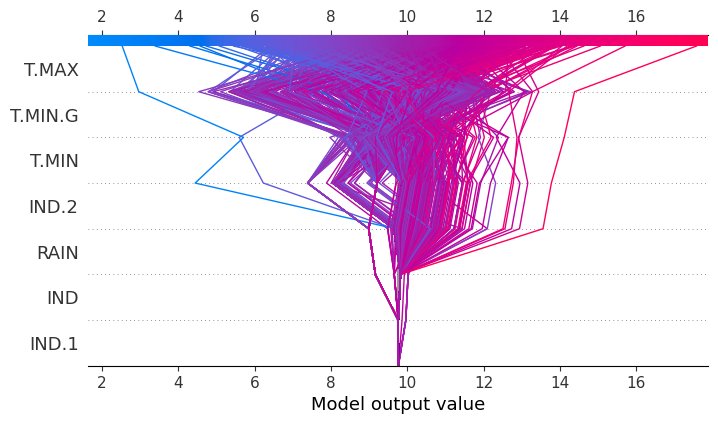

In [30]:
shap.decision_plot(explainer.expected_value, shap_values.values, X_test)